In [51]:
#uncomment to clean up the variables
%reset -f

In [52]:
fits_to_dict = {
    "INS": "INS",
    "CH": "CH",
    "NDIT": "NDIT",
    "DIT": "DIT",
    "SNR": "SNR",
    "Lam_Ref": "SNR_WAVE",
    "PWV": "PWV",
    "FLI": "FLI",
    "SEE": "SEE",
    "AM": "AM",
    "Obj_SED": "SPEC",
    "SED_Name": "TEMP_NAME",
    "OBJ_MAG": "MAG",
    "MAG_SYS": "SYS",
    "MAG_FIL": "FIL",
    "Z": "Z",
    "BB_Temp": "TEMP",
    "PL_Index": "INDEX",
    "SEL_FLUX": "FLUX",
    "SEL_CWAV": "WAVE_CENTER",
    "SEL_FWHM": "WAVE_FWHM",
    "Obj_Spat_Dis": "OBJ",
    "Ext_Ell": "IMA_ELL",
    "Ext_Unif_Diam": "IMA_FWHM",
    "Sersic_Reff": "IMA_REFF",
    "Sersic_Ind": "IMA_N",
    "COADD_WL": "SP_BIN",
    "IMA_AREA": "IMA_AREA",
    "COADD_XY": "IMA_HSIZE"
}

In [53]:
import sys
import os
import matplotlib.pyplot as plt
from astropy import constants
import skycalc_ipy
from mpdaf.obj import Spectrum
#from astropy import constants

import warnings
warnings.filterwarnings('ignore')

# Add the project root directory to Python path
project_root = os.path.dirname(os.getcwd())  # Adjust path as needed
sys.path.insert(0, project_root)

from pyetc_dev import *

#this is a package of mine for plot quality, comment it and the following row in case you use this notebook 
#from setplot import set_plot_style
#set_plot_style()

In [54]:
### set up the container
obj = WST(log = 'DEBUG', skip_dataload = False)

In [55]:
# read the fits file and store it in a dictionary
from astropy.io import fits
import pandas as pd
from astropy.table import Table


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

data_dict = {}

# read the fits file and store it in a dictionary
tab = Table.read('/Users/andre/Desktop/INAF/WST/template.fits', format='fits')
data_dict = tab.to_pandas()

In [56]:
#SPEC = template, pl, bb, line

#SP_BIN = binning of the spectral trace, integer

#TEMP_NAME is the name of the template, you can list them with sed_models.eso_spectra_files.keys()

################ only for line #############################
#SPEC_range = fixed, adaptative, None

#### only for fixed ####
#SPEC_HSIZE = 5 [range will be 2 * SPEC_HSIZE + 1]
########################

#### only for adaptative ####
#SPEC_KFWHM = 3 [range will be +- SPEC_KFWHM]
#OPT_SPEC = True, to compute the best SPEC_KFWHM for the maximization of the SNR
#############################
############################################################


#OBJ = sb, ps, resolved

################ only for resolved ###############################
#IMA = moffat, sersic 

#IMA_ELL = 0.

#### only for moffat ####
#IMA_FWHM = 1. in arcsec
#IMA_BETA = 2.5 in arcsec
#IMA_KFWHM = 3 by default
#########################

#### only for sersic ####
#IMA_REFF = 1. in arcsec
#IMA_N = 2.
#IMA_KREFF = 6 by default
#########################

##################################################################

################ only for sb ###############################
#IMA_AREA = 1. arcsec, area to use for the SNR computation
############################################################

################ only for ps and resolved ##################
#IMA_RANGE = circular_adaptative, square_fixed

#### only for square_fixed ####
#IMA_HSIZE = 5 [range will be 2 * IMA_HSIZE + 1] #INTEGER
###############################

#### only for circular_adaptative ####
#IMA_KFWHM = 3 [range will be +- IMA_KFWHM]
#OPT_IMA = True, to compute the best IMA_KFWHM for the maximization of the SNR
######################################
############################################################

### "SKYCALC": if false it uses the default configurations in the folder using MOON, 
###true it computes the sky with a call to the ESO Skycalc and want the FLI and PWV parameters

# SNR & SNR_WAVE are the target SNR at a specific wave if you want to compute the NDIT or DIT

#Here an example of how it should be

full_obs = {
    "INS": "ifs",
    "CH": "red",
    
    "NDIT": 5,
    "DIT": None, 
    
    "SNR": 10,
    "SNR_WAVE":7000,
    
    "MOON": 'greysky',
    "PWV": 10,
    "FLI": 0,
    "SEE": 0.8,
    "AM": 1.16,
    "SKYCALC": True,
    
    "SPEC": 'bb',
    "TEMP_NAME": None,
    
    "MAG": 20,
    "SYS": 'AB',
    "FIL": 'iSDSS',
    
    "Z": 0,
    "TEMP": 11000.,
    "INDEX": -2.,
    
    "FLUX": 50e-16,
    "WAVE_CENTER": 7000,
    "WAVE_FWHM":20,
    
    "OBJ": 'resolved',
    
    "IMA": 'sersic',
    "IMA_ELL": 0.,
    
    "IMA_FWHM": 1.,
    "IMA_BETA": 999,
    "IMA_KFWHM": 10,
    
    "IMA_REFF": 8.00,
    "IMA_N": 4.00,
    "IMA_KREFF": 5,
    
    "SPEC_RANGE": 'fixed',
    "SPEC_KFWHM": 10,
    "SPEC_HSIZE": 30,
    
    "SP_BIN": 1,
    
    "IMA_AREA": (1*0.2)**2,
    "IMA_RANGE": 'square_fixed',
    "IMA_HSIZE": 1,
    
    "OPT_SPEC": False,
    "OPT_IMA": False,
    "FRAC_SPEC_MEAN_OPT_IMAGE": 1
}

Obj_SED = {
    1: 'pl',
    2: 'bb',
    3: 'pl',
    4: 'template',
    5: 'line'
}

# Object Spatial Distribution
Obj_Spat_Dis = {
    1: 'ps',
    3: 'sb',
    4: 'sersic'
}

filters = {
   1: 'U',
   2: 'B',
   3: 'V',
   4: 'R',
   5: 'I',
   6: 'J',
   7: 'H',
   8: 'K',
   9: 'uSDSS',
   10: 'gSDSS',
   11: 'rSDSS',
   12: 'iSDSS',
   13: 'zSDSS',
   14: 'jSDSS',
   15: 'uLSST',
   16: 'gLSST',
   17: 'rLSST',
   18: 'iLSST',
   19: 'zLSST',
}

MAG_SYS = {
    1: 'AB',
    2: 'Vega'
}

INS = {
    1: 'ifs'
}

CH = {
    1: 'blue',
    2: 'red'
}


In [57]:
'''
for key in data_dict.keys():
    if key in fits_to_dict.keys():
        print(full_obs[fits_to_dict[key]])
    else:
        print(f"{key} not found in fits_to_dict")
'''

res_dict = data_dict.copy()

print(res_dict)
# iter over the res_dict row by row
for index, row in res_dict.iterrows():
    print("Processing row: ", row['ID'])

    for key in res_dict.keys():
        if key in fits_to_dict.keys():
            full_obs[fits_to_dict[key]] = row[key]
        else:
            print(f"{key} not found in fits_to_dict")
    
    # SED
    try:
        full_obs[fits_to_dict['Obj_SED']] = Obj_SED[row['Obj_SED']]
        if row['Obj_SED'] == 1:
            full_obs[fits_to_dict['PL_Index']] = 0
        if row['Obj_SED'] == 4:
            full_obs[fits_to_dict['SED_Name']] = row['SED_Name'].decode('utf-8')
    except KeyError as e:
        print("Error in SED", e)
        res_dict.loc[index, 'ERR'] = 1
        continue

    # Object Spatial Distribution
    try:
        full_obs[fits_to_dict['Obj_Spat_Dis']] = Obj_Spat_Dis[row['Obj_Spat_Dis']]
    except KeyError as e:
        print("Error in Object Spatial Distribution", e)
        res_dict.loc[index, 'ERR'] = 1
        continue

    # filters
    try:
        if pd.isna(row['MAG_FIL']):
            full_obs[fits_to_dict['MAG_FIL']] = None
        else:
            full_obs[fits_to_dict['MAG_FIL']] = filters[row['MAG_FIL']]
    except KeyError as e:
        print("Error in MAG_FIL", e)
        res_dict.loc[index, 'ERR'] = 1
        continue

    # MAG_SYS
    try:
        if row['ID'] == 6:
            print(row['MAG_SYS'])
            print(MAG_SYS[row['MAG_SYS']])
        if pd.isna(row['MAG_SYS']):
            full_obs[fits_to_dict['MAG_SYS']] = None
        else:
            full_obs[fits_to_dict['MAG_SYS']] = MAG_SYS[row['MAG_SYS']]
    except KeyError as e:
        print("Error in MAG_SYS", e)
        res_dict.loc[index, 'ERR'] = 1
        continue

    # INS 
    try:
        full_obs[fits_to_dict['INS']] = INS[row['INS']]
    except KeyError as e:
        print("Error in INS", e)
        res_dict.loc[index, 'ERR'] = 1
        continue

    # CH
    try:
        full_obs[fits_to_dict['CH']] = CH[row['CH']]
    except KeyError as e:
        print("Error in CH", e)
        res_dict.loc[index, 'ERR'] = 1
        continue

    # get DIT
    DIT = full_obs['DIT']
    SNR = full_obs['SNR']

    if np.isnan(SNR) and not np.isnan(DIT):
        full_obs["SP_BIN"] = 1 #SNR test only # TEMP FIX BUT THIS IS A BUG if set to 2 as 1347     res['spec']['snr_rebin'] = rebin_spectrum( is not defined
    con, ob, spe, im, spe_input = obj.build_obs_full(full_obs)

    if np.isnan(DIT):
        res = obj.time_from_source(con, im, spe, dit=True)
    else:
        if np.isnan(SNR):
            res = {'SNR': obj.snr_from_source(con, im, spe)['spec']['snr'][1000]} 
            print("SNR: " + str(res['SNR']))
        else:
            res = obj.time_from_source(con, im, spe, dit=False)
        
    for key in res.keys():
        # sey key uppercase
        dict_key = key.upper()
        res_dict.loc[index, dict_key] = res[key]

    print("DONE WITH ROW: ", index)

print(res_dict)
        



    ID  Obj_Spat_Dis  Ext_Unif_Diam  Sersic_Reff  Sersic_Ind  Ext_Ell  \
0    1             1            NaN          NaN         NaN      NaN   
1   10             1            NaN          NaN         NaN      NaN   
2    2             1            NaN          NaN         NaN      NaN   
3   20             1            NaN          NaN         NaN      NaN   
4    3             1            NaN          NaN         NaN      NaN   
5   30             1            NaN          NaN         NaN      NaN   
6    4             1            NaN          NaN         NaN      NaN   
7   40             1            NaN          NaN         NaN      NaN   
8    5             3            NaN          NaN         NaN      NaN   
9    6             3            NaN          NaN         NaN      NaN   
10   7             3            NaN          NaN         NaN      NaN   
11   8             3            NaN          NaN         NaN      NaN   

    Obj_SED  BB_Temp  PL_Index        SED_Name  SE

IndexError: index 1000 is out of bounds for axis 0 with size 61

In [24]:
res_snr = obj.snr_from_source(con, im, spe)

NameError: name 'con' is not defined

In [ ]:
res_time

NameError: name 'res_time' is not defined

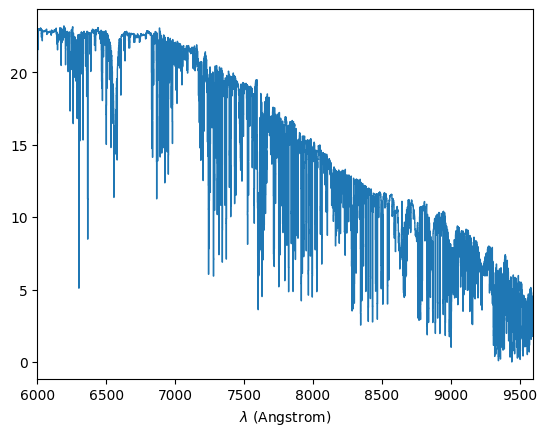

In [10]:
res_snr['spec']['snr'].plot()

In [11]:
e_dit = res_snr['spec']['nph_source']
e_dit /= ob['ndit']

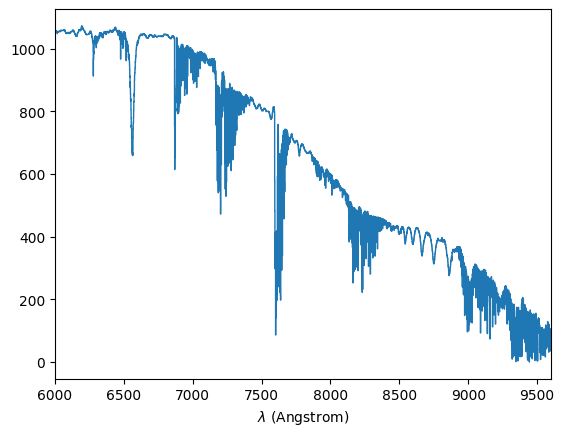

In [12]:
e_dit.plot()